In [28]:
from newsapi import NewsApiClient
import pickle
import re
import numpy as np
from nltk import FreqDist
from nltk import everygrams
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from pylab import rcParams
from dateutil import parser
from matplotlib.dates import DateFormatter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
#newsapi = NewsApiClient(api_key='a785f3dfd1e04e26b28230351629f2d8')

In [56]:
#sources = newsapi.get_sources()

In [57]:
#id=[]
#for i in sources['sources']:
    #if i['language']=='en':
        #id.append(i['id'])
#id

['abc-news',
 'abc-news-au',
 'al-jazeera-english',
 'ars-technica',
 'associated-press',
 'australian-financial-review',
 'axios',
 'bbc-news',
 'bbc-sport',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'business-insider-uk',
 'buzzfeed',
 'cbc-news',
 'cbs-news',
 'cnbc',
 'cnn',
 'crypto-coins-news',
 'daily-mail',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'financial-post',
 'financial-times',
 'football-italia',
 'fortune',
 'four-four-two',
 'fox-news',
 'fox-sports',
 'google-news',
 'google-news-au',
 'google-news-ca',
 'google-news-in',
 'google-news-uk',
 'hacker-news',
 'ign',
 'independent',
 'mashable',
 'medical-news-today',
 'metro',
 'mirror',
 'msnbc',
 'mtv-news',
 'mtv-news-uk',
 'national-geographic',
 'national-review',
 'nbc-news',
 'news24',
 'new-scientist',
 'news-com-au',
 'newsweek',
 'new-york-magazine',
 'next-big-future',
 'nfl-news',
 'nhl-news',
 'politico',
 'polygon',
 'recode',
 'reddit-r-all',
 'r

In [58]:
#articles=[]
#for i in id:
    #all_articles = newsapi.get_everything(q='brexit',from_param='2019-04-06',to='2019-04-09',sources=i)
    #articles.append(all_articles)

In [59]:
#with open('articles12h', 'wb') as fp:
    #pickle.dump(articles, fp)

In [29]:
with open('articles24h','rb') as fp:
    articles=pickle.load(fp)


In [36]:
while [] in articles:
    articles.remove([])
for i in articles:
    if i['totalResults']==0:
        articles.remove(i)
with open('sw1.txt','r') as f:
    stop_words=f.readlines()
    for i in range(len(stop_words)):
        stop_words[i]=stop_words[i].rstrip().lower()

In [37]:
x=[]
news=[]
article_time_list=[]

for i in articles:
    if i['articles'][0]['source']['name'] not in x:
        x.append(i['articles'][0]['source']['name'])
        
        i=i['articles']
        sum=0
        for j in i:
            article_time=j['publishedAt']
            j=j['title']
            j=j.lower()
            j=j.replace('’','\'')
            j=j.split()
            j = [w for w in j if not w in stop_words]
            j=" ".join(j)
            j = re.sub(r'[^\w\s]','',j)
    
            if j not in news:
                article_time_list.append(article_time)
                news.append(j)
                sum+=1
        with open('articles_per_source.txt','a') as f:
            f.write(i[0]['source']['name']+'\t'+str(sum)+'\n')

len(news)

356

In [38]:
with open('topics24h','r') as f:
    topics=f.readlines()

for i in range(len(topics)):
    topics[i]=topics[i].rstrip()
    topics[i] = re.sub(r'[^\w\s]','',topics[i])
    topics[i]=topics[i].split()
    topics[i]=list(set(topics[i]))
    if 'http' in topics[i]:
        topics[i].remove('http')
    if 'https' in topics[i]:
        topics[i].remove('https')
    topics[i]=" ".join(topics[i])
topics=list(set(topics))
len(topics)-23

139

In [39]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [46]:
x=[]
sum=0
for i in topics:
    for j in news:
        if get_jaccard_sim(i,j)>0.2:
            x.append(i)
            print(i,'\n',j,'\n')
            sum+=1
            break
print(sum)

globalist brexit annabd20 al uk gore res forcing referendum stealingthevote cowards politicians election 
 al gore brands uk politicians cowards forcing brexit referendum 

british clear brexit government people half parliament betray delivering 
 majority british parliament brexit referendum  reuters analysis 

labour leave 
 leave eu work 

nickreeves9876 vote brexit labour push soft peoples 
 big brexit vote 

globalist brexit forcing annabd20 uk al res gore referendum stealingthevote cowards politicians election 
 al gore brands uk politicians cowards forcing brexit referendum 

leave eu 
 latest may uk leave eu deal rejected 

brexit yo generation party argyleloz fucking blamed eu theresa 
 theresa implore eu win backing brexit deal 

gerrymandering brexit won 
 driving brexit 

deal brexit 
 we leave theresa sounds lastditch warning brexit deal 

nickreeves9876 greater amp brexit sickening downplay deceit corbyn climate pr poverty change crisis claiming 
 poverty climate importan

In [47]:

tfidf_vectorizer = TfidfVectorizer()

In [48]:
sum=0
for i in topics:
    news.append(i)
    tfidf_matrix = tfidf_vectorizer.fit_transform(news)
    a=cosine_similarity(tfidf_matrix[-1], tfidf_matrix)[0][:-1]
    del news[-1]
    if max(a)>0.25:
        sum+=1
        x.append(i)
        print(i,'\n',news[np.argmax(a)],max(a),'\n')
print(sum)    

globalist brexit annabd20 al uk gore res forcing referendum stealingthevote cowards politicians election 
 al gore brands uk politicians cowards forcing brexit referendum 0.6549552418747807 

british clear brexit government people half parliament betray delivering 
 brexit deal parliament 0.2519419824201741 

birminghams crufts 
 crufts dog show affected brexit 0.3304631872084195 

labour leave 
 leave eu work 0.40517350401803387 

globalist brexit forcing annabd20 uk al res gore referendum stealingthevote cowards politicians election 
 al gore brands uk politicians cowards forcing brexit referendum 0.6549552418747807 

leave eu 
 leave eu work 0.6934338341058801 

deal brexit 
 brexit deal parliament 0.5921284933388467 

nickreeves9876 greater amp brexit sickening downplay deceit corbyn climate pr poverty change crisis claiming 
 poverty climate important brexit corbyn 0.3683197345216178 

madness brexit week sign mps make save britain 
 mps reject theresa mays brexit deal week 0.2656

In [56]:
x=list(set(x))
len(x)
x

['postbrexit decision',
 'latest brexit',
 'requires eu backstop femi_sorry northern faith summary negotiate ireland good leave',
 'week twitter time',
 'deal',
 'brexit cox jo pro murder',
 '17410742 week brexiteers parliament votes series britain',
 'british people',
 'globalist brexit annabd20 al uk gore res forcing referendum stealingthevote cowards politicians election',
 'british clear brexit government people half parliament betray delivering',
 'british mep',
 'working corbyn',
 'british brexit people belongs world tells',
 'brexit bevanite2017 paste',
 'brexit britain',
 'birminghams crufts',
 'british mike_fabricant clear brexit government people half parliament betray delivering',
 'labour leave',
 'voted brexit',
 'nickreeves9876 vote brexit labour push soft peoples',
 'brexit pro',
 'globalist brexit annabd20 al gore uk res forcing referendum stealingthevote cowards politicians election',
 'globalist brexit forcing annabd20 uk al res gore referendum stealingthevote cowards

In [54]:
with open('topics24h','r') as f:
    topics=f.readlines()

time_list=[]
for i in range(len(topics)):
    topics[i]=topics[i].rstrip()
    if re.match(r'^2019',topics[i]):
        time_list.append(topics[i])
    topics[i] = re.sub(r'[^\w\s]','',topics[i])
    topics[i]=topics[i].split()
    topics[i]=list(set(topics[i]))
    if 'http' in topics[i]:
        topics[i].remove('http')
    if 'https' in topics[i]:
        topics[i].remove('https')
    topics[i]=" ".join(topics[i])
len(topics)

226

In [20]:
sum=0
y1=[]
for i in topics[1:]:
    if re.search(r'^[0-9 ]*$',i):
        y1.append(sum)
        sum=0
    if i in x:
        sum+=1
        x.remove(i)
y1.append(sum)
y1

[1, 2, 2, 2, 2, 2, 3, 1, 2, 0, 5, 0, 9, 3, 1, 0, 0, 0, 5, 1, 4, 2, 2]

In [25]:
for i in range(len(time_list)):
    time_list[i]=parser.parse(time_list[i])

In [26]:
len(x)

0

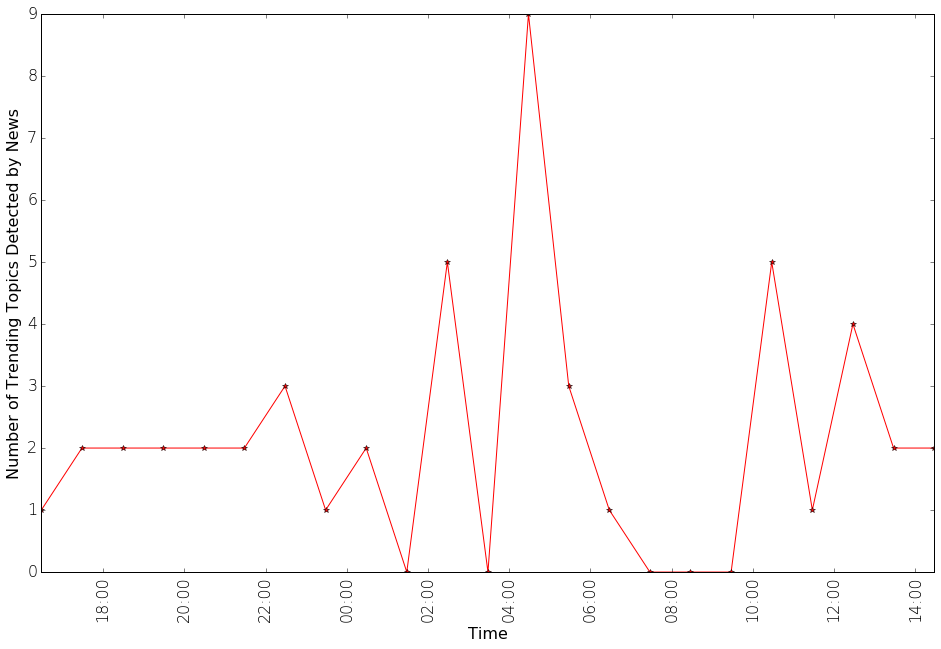

In [27]:

rcParams['figure.figsize'] = 12,10
formatter = DateFormatter('%H:%M')



rcParams['figure.figsize'] = 16,10
rcParams['font.size']=16
rcParams['font.weight']=4
    
    
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of Trending Topics Detected by News')
plt.plot(time_list,y1,marker='*',linewidth=1,color='r')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.savefig('index.eps',format='eps')


In [91]:
for i in range(len(time_list)):
    time_list[i]=str(time_list[i])
time_list

['2019-03-08 16:28:46',
 '2019-03-08 17:28:45',
 '2019-03-08 18:28:45',
 '2019-03-08 19:28:45',
 '2019-03-08 20:28:45',
 '2019-03-08 21:28:45',
 '2019-03-08 22:28:45',
 '2019-03-08 23:28:45',
 '2019-03-09 00:28:39',
 '2019-03-09 01:28:39',
 '2019-03-09 02:28:34',
 '2019-03-09 03:28:34',
 '2019-03-09 04:28:24',
 '2019-03-09 05:27:54',
 '2019-03-09 06:27:49',
 '2019-03-09 07:27:46',
 '2019-03-09 08:27:46',
 '2019-03-09 09:27:46',
 '2019-03-09 10:27:46',
 '2019-03-09 11:27:45',
 '2019-03-09 12:27:44',
 '2019-03-09 13:27:44',
 '2019-03-09 14:27:40']

In [143]:
for i in range(len(article_time_list)):
    article_time_list[i]=parser.parse(article_time_list[i])


TypeError: Parser must be a string or character stream, not datetime

In [150]:
from datetime import timedelta
article_time_list.sort()
time_list=[]
time_list.append(article_time_list[0])
it=article_time_list[0]
cnt=1
cnt_list=[]
for i in article_time_list[1:]:
    if i-it>timedelta(seconds=3600):
        time_list.append(i)
        it=i
        cnt_list.append(cnt)
        cnt=0
    else:
        cnt+=1

if cnt>0:
    cnt_list.append(cnt)

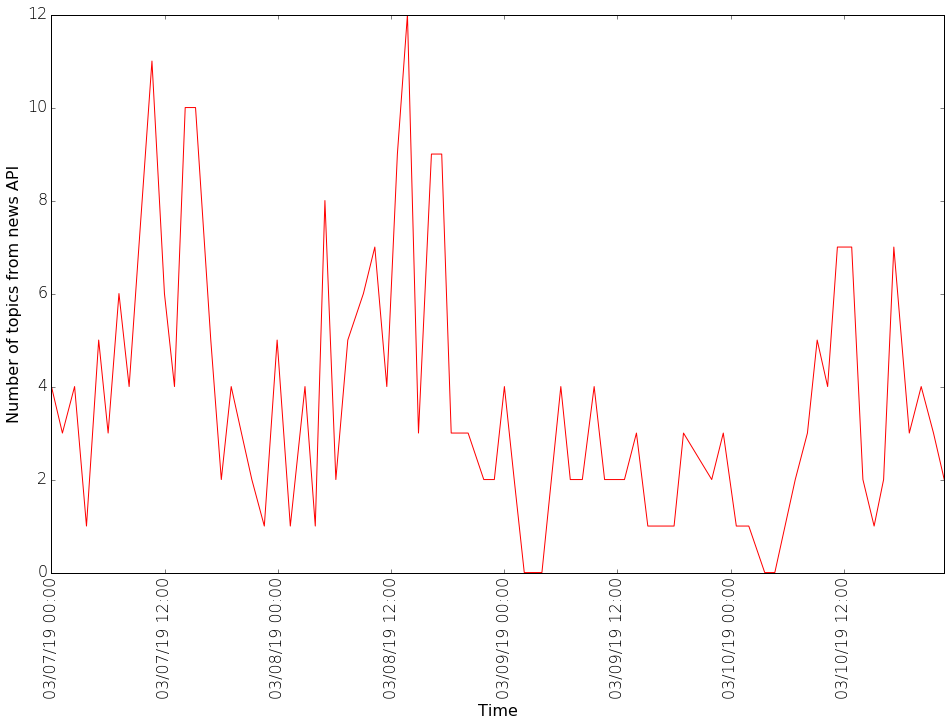

In [173]:
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of topics from news API')
plt.plot(time_list,cnt_list,linewidth=1,color='r')
formatter = DateFormatter('%D %H:%M')

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.savefig('index2.eps',format='eps',figsize=(12,10))

In [93]:
with open('topics12h','r') as f:
    topics=f.readlines()

y=[]
for i in range(len(topics)):
    sentence=topics[i].rstrip()
    sentence = re.sub(r'[^\w\s]','',sentence)
    sentence=sentence.split()
    sentence=list(set(sentence))
    if 'http' in sentence:
        sentence.remove('http')
    if 'https' in sentence:
        sentence.remove('https')
    sentence=" ".join(sentence)
    if sentence in x:
        y.append(topics[i])

y=list(set(y))
with open('12htopics_in_news','w') as f:
    f.writelines(y)

In [90]:
x

['brexit deal',
 'daily mail',
 'doozy_45 rover job brexit confirms land 4500 cuts peoplesvote jaguar eu icymi httpstco8ed3cwee9k',
 'family leadsoms',
 'based brexit',
 'mu week end khaoniao eu stop idea playing',
 'peoplesvote brexit',
 'viscountbraith1 breaking',
 'andrea leadsom',
 'good morning',
 'speech theresa brexit mays httpstcoybtqya84mc work jasemonkey comedy theresamay genius',
 'pause long',
 'brexit prime paralysed minister system',
 'care brexit farmer damage hilarybennmp liveli calling deal explain',
 'labour brexit backing httpstcokot55fzkk5 deliver referendum',
 'mind brexit',
 'huge andrew_adonis brexit great nightmare islington support end revoke 50 yesterday referendum rally article',
 'voted leave',
 'referendum brexit',
 'brexit deliver',
 'movement end freedom',
 'care brexit hilarybennmp farmer damage liveli calling deal explain',
 'brexit berlin angela 1200 ahead theresa_may tomorrow summit merkel',
 'ecb minutes',
 'time brexit funny true sad deplrblerzistr 